<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.945946,39.788022,32.915277,-0.198925,154.450320,154.524339,-0.074020
1,0.0,1.0,22.973039,51.483753,39.777039,-0.332106,123.901725,124.364633,-0.462907
2,0.0,2.0,94.009889,85.320662,80.688278,-0.245560,269.773270,270.238882,-0.465612
3,0.0,3.0,29.124765,85.932547,33.735759,0.402916,159.195987,159.030396,0.165591
4,0.0,4.0,55.949254,91.236244,53.338663,-0.345692,210.178469,210.780302,-0.601833
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,71.283956,94.129792,89.738027,-0.046362,265.105412,264.943027,0.162385
29996,999.0,26.0,58.578417,52.678310,43.383053,-0.394037,164.245743,164.719124,-0.473381
29997,999.0,27.0,36.215699,53.121754,43.329043,0.173972,142.840468,142.691797,0.148671
29998,999.0,28.0,32.818839,78.915089,64.387464,-0.056656,186.064736,185.964277,0.100458


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.945946,39.788022,32.915277,-0.198925,154.450320,154.524339,-0.074020
1,0.0,1.0,22.973039,51.483753,39.777039,-0.332106,123.901725,124.364633,-0.462907
2,0.0,2.0,94.009889,85.320662,80.688278,-0.245560,269.773270,270.238882,-0.465612
3,0.0,3.0,29.124765,85.932547,33.735759,0.402916,159.195987,159.030396,0.165591
4,0.0,4.0,55.949254,91.236244,53.338663,-0.345692,210.178469,210.780302,-0.601833
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,71.283956,94.129792,89.738027,-0.046362,265.105412,264.943027,0.162385
29996,999.0,26.0,58.578417,52.678310,43.383053,-0.394037,164.245743,164.719124,-0.473381
29997,999.0,27.0,36.215699,53.121754,43.329043,0.173972,142.840468,142.691797,0.148671
29998,999.0,28.0,32.818839,78.915089,64.387464,-0.056656,186.064736,185.964277,0.100458


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.945946  39.788022  32.915277 -0.198925  154.450320   
      1.0    22.973039  51.483753  39.777039 -0.332106  123.901725   
      2.0    94.009889  85.320662  80.688278 -0.245560  269.773270   
      3.0    29.124765  85.932547  33.735759  0.402916  159.195987   
      4.0    55.949254  91.236244  53.338663 -0.345692  210.178469   
...                ...        ...        ...       ...         ...   
999.0 25.0   71.283956  94.129792  89.738027 -0.046362  265.105412   
      26.0   58.578417  52.678310  43.383053 -0.394037  164.245743   
      27.0   36.215699  53.121754  43.329043  0.173972  142.840468   
      28.0   32.818839  78.915089  64.387464 -0.056656  186.064736   
      29.0   36.689560  84.688345  62.114517 -0.584780  192.907642   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    154.524339 -0.074020  
      1.0    124.364633 -0.462907  
      2.0    270.238882 -0.465612  
      3.0    159.030396  0.165591  
      4.0    210.780302 -0.601833  
...                 ...       ...  
999.0 25.0   264.943027  0.162385  
      26.0   164.719124 -0.473381  
      27.0   142.691797  0.148671  
      28.0   185.964277  0.100458  
      29.0   193.326193 -0.418551  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.945946  39.788022  32.915277 -0.198925  154.450320   
      1.0    22.973039  51.483753  39.777039 -0.332106  123.901725   
      2.0    94.009889  85.320662  80.688278 -0.245560  269.773270   
      3.0    29.124765  85.932547  33.735759  0.402916  159.195987   
      4.0    55.949254  91.236244  53.338663 -0.345692  210.178469   
...                ...        ...        ...       ...         ...   
999.0 25.0   71.283956  94.129792  89.738027 -0.046362  265.105412   
      26.0   58.578417  52.678310  43.383053 -0.394037  164.245743   
      27.0   36.215699  53.121754  43.329043  0.173972  142.840468   
      28.0   32.818839  78.915089  64.387464 -0.056656  186.064736   
      29.0   36.689560  84.688345  62.114517 -0.584780  192.907642   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    154.524339 -0.074020  
      1.0    124.364633 -0.462907  
      2.0    270.238882 -0.465612  
      3.0    159.030396  0.165591  
      4.0    210.780302 -0.601833  
...                 ...       ...  
999.0 25.0   264.943027  0.162385  
      26.0   164.719124 -0.473381  
      27.0   142.691797  0.148671  
      28.0   185.964277  0.100458  
      29.0   193.326193 -0.418551  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.945946,39.788022,32.915277,-0.198925,154.450320,154.524339,-0.074020
1,0.0,1.0,22.973039,51.483753,39.777039,-0.332106,123.901725,124.364633,-0.462907
2,0.0,2.0,94.009889,85.320662,80.688278,-0.245560,269.773270,270.238882,-0.465612
3,0.0,3.0,29.124765,85.932547,33.735759,0.402916,159.195987,159.030396,0.165591
4,0.0,4.0,55.949254,91.236244,53.338663,-0.345692,210.178469,210.780302,-0.601833
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,71.283956,94.129792,89.738027,-0.046362,265.105412,264.943027,0.162385
29996,999.0,26.0,58.578417,52.678310,43.383053,-0.394037,164.245743,164.719124,-0.473381
29997,999.0,27.0,36.215699,53.121754,43.329043,0.173972,142.840468,142.691797,0.148671
29998,999.0,28.0,32.818839,78.915089,64.387464,-0.056656,186.064736,185.964277,0.100458


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.945946  39.788022  32.915277 -0.198925  154.450320   
      1.0    22.973039  51.483753  39.777039 -0.332106  123.901725   
      2.0    94.009889  85.320662  80.688278 -0.245560  269.773270   
      3.0    29.124765  85.932547  33.735759  0.402916  159.195987   
      4.0    55.949254  91.236244  53.338663 -0.345692  210.178469   
...                ...        ...        ...       ...         ...   
999.0 25.0   71.283956  94.129792  89.738027 -0.046362  265.105412   
      26.0   58.578417  52.678310  43.383053 -0.394037  164.245743   
      27.0   36.215699  53.121754  43.329043  0.173972  142.840468   
      28.0   32.818839  78.915089  64.387464 -0.056656  186.064736   
      29.0   36.689560  84.688345  62.114517 -0.584780  192.907642   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    154.524339 -0.074020  
      1.0    124.364633 -0.462907  
      2.0    270.238882 -0.465612  
      3.0    159.030396  0.165591  
      4.0    210.780302 -0.601833  
...                 ...       ...  
999.0 25.0   264.943027  0.162385  
      26.0   164.719124 -0.473381  
      27.0   142.691797  0.148671  
      28.0   185.964277  0.100458  
      29.0   193.326193 -0.418551  

[30000 rows x 7 columns]

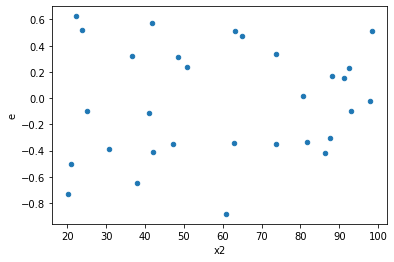

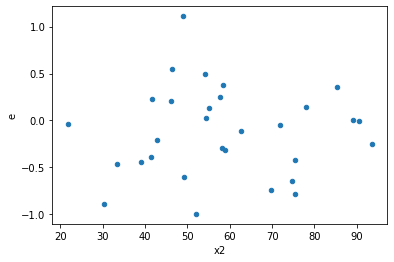

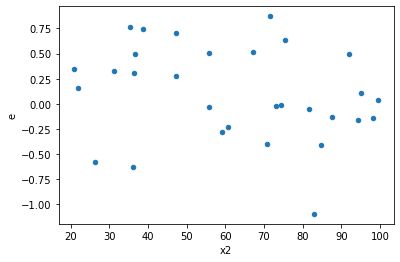

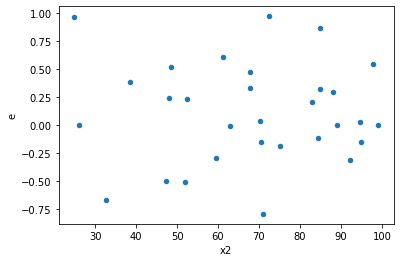

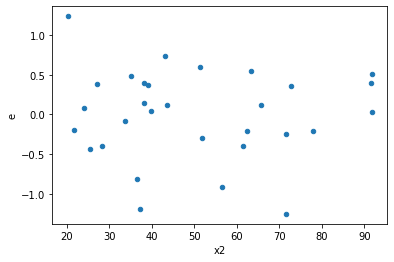

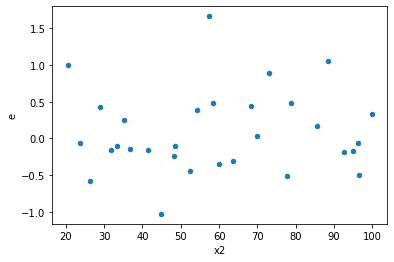

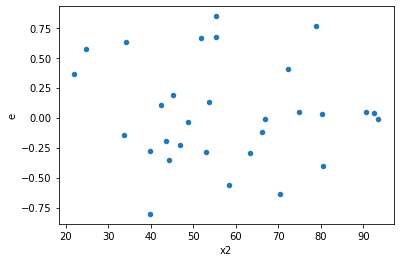

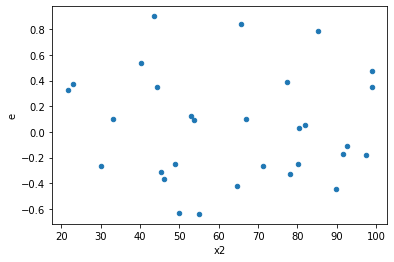

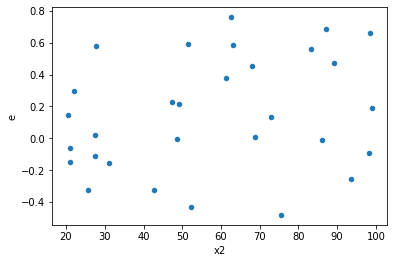

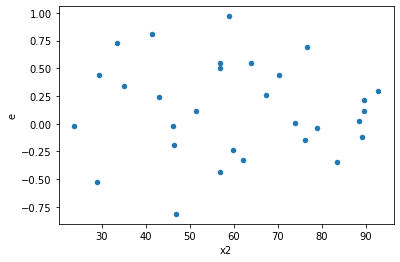

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,0.9591697178754734,1.1432201033854106,0.10657441309727483,0.1270244559317123,1.1918851086308293,0.7979925279370379,0.601003736031481,0.39899626396851895,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,1.6152809316485421,2.935512504602917,0.17947565907206023,0.3261680560669908,1.8173386728505225,0.38682309053252517,0.8065884547337374,0.19341154526626259,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,0.45149291116971946,1.7066974022146502,0.05016587901885772,0.18963304469051667,3.78012004173658,0.06053930325156509,0.9697303483742175,0.030269651625782545,Reject005=1 : Homoscedasticity
12.0,9.0,9.0,0.558939632851725,1.4843480857374929,0.06210440365019167,0.16492756508194364,2.6556500890164276,0.16185345686292463,0.9190732715685377,0.08092672843146231,Reject005=1 : Homoscedasticity
14.0,9.0,9.0,2.151685578677705,3.040175771427003,0.23907617540863388,0.33779730793633367,1.412927521359933,0.6148876234788729,0.6925561882605635,0.30744381173943647,Reject005=1 : Homoscedasticity
18.0,9.0,9.0,0.8259454717379442,1.4213115206922309,0.0917717190819938,0.15792350229913676,1.720829727053924,0.4311028982621954,0.7844485508689023,0.2155514491310977,Reject005=1 : Homoscedasticity
20.0,9.0,9.0,1.444113657517919,1.592837327257465,0.16045707305754656,0.17698192525082945,1.1029861250638444,0.8863028090139506,0.5568485954930247,0.4431514045069753,Reject005=1 : Homoscedasticity
21.0,9.0,9.0,1.3384359589621633,1.7679425811847191,0.14871510655135148,0.1964380645760799,1.3209018850297474,0.6851653313747748,0.6574173343126126,0.3425826656873874,Reject005=1 : Homoscedasticity
22.0,9.0,9.0,1.724113026396713,1.762777731901385,0.19156811404407922,0.19586419243348724,1.0224258531272041,0.9741871406301943,0.5129064296849029,0.48709357031509715,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.9591697178754734,1.1432201033854106,0.10657441309727483,0.1270244559317123,1.1918851086308293,0.7979925279370379,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,1.4156629149033058,1.1611012928557654,0.15729587943370063,0.1290112547617517,0.820182036720989,0.7725932247932751,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,3.7506986798583686,0.7963477440168174,0.41674429776204097,0.08848308266853527,0.21231984011226637,0.030478183526631838,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,1.6152809316485421,2.935512504602917,0.17947565907206023,0.3261680560669908,1.8173386728505225,0.38682309053252517,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,0.45149291116971946,1.7066974022146502,0.05016587901885772,0.18963304469051667,3.78012004173658,0.06053930325156509,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,2.211067594908278,0.5567062446568716,0.2456741772120309,0.061856249406319064,0.25178164880118264,0.05212348744526342,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,1.6135781451705407,0.9650878579578029,0.1792864605745045,0.10723198421753366,0.5981041952299136,0.4556931150831594,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,0.9124679543224173,0.30386783244065585,0.10138532825804637,0.033763092493406206,0.3330175388639295,0.1170047826723988,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,1.5881224474856097,0.5640680366399967,0.1764580497206233,0.06267422629333297,0.355179185038947,0.13904737361377972,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      926
Reject005=0 : Heteroscedasticity     74
Name: Result_test, dtype: int64